In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import sys
sys.path.append("..")
from src import color_converter

In [5]:
blue_color_scheme = ["#f7fbff", "#eff3ff", "#deebf7", "#c6dbef", "#bdd7e7", "#9ecae1", "#6baed6", "#4292c6", "#3182bd", "#2171b5", "#08519c", "#084594", "#08306b"]
green_color_scheme = ['#f7fcf5', '#edf8e9', '#e5f5e0','#c7e9c0', '#bae4b3', '#a1d99b','#74c476','#41ab5d','#31a354' ,'#238b45','#006d2c', '#005a32','#00441b']
orange_color_scheme = ['#fff5eb', '#feedde', '#fee6ce', '#fdd0a2', '#fdbe85', '#fdae6b', '#fd8d3c', '#f16913', '#e6550d', '#d94801', '#a63603', '#8c2d04', '#7f2704']
purple_color_scheme = ['#fcfbfd', '#f2f0f7', '#efedf5', '#dadaeb', '#cbc9e2', '#bcbddc', '#9e9ac8', '#807dba', '#756bb1', '#6a51a3', '#54278f', '#4a1486', '#3f007d']
red_color_scheme = ['#fff5f0', '#fee5d9', '#fee0d2', '#fcbba1', '#fcae91', '#fc9272', '#fb6a4a', '#ef3b2c', '#de2d26', '#cb181d', '#a50f15', '#99000d', '#67000d']
grey_color_scheme = ['#ffffff','#f7f7f7', '#f0f0f0','#d9d9d9','#cccccc','#bdbdbd','#969696','#737373','#636363','#525252','#252525','#000000']

In [6]:
rgb_in_hex = grey_color_scheme

In [7]:
rgb = []
rgb_255 = []
for i in rgb_in_hex:
    rgb_255.append(color_converter.hex_to_rgb(i))
    rgb.append(color_converter.rgb255_to_rgb01(color_converter.hex_to_rgb(i)))
rgb_255

[(255, 255, 255),
 (247, 247, 247),
 (240, 240, 240),
 (217, 217, 217),
 (204, 204, 204),
 (189, 189, 189),
 (150, 150, 150),
 (115, 115, 115),
 (99, 99, 99),
 (82, 82, 82),
 (37, 37, 37),
 (0, 0, 0)]

In [8]:
rgb

[[1.0, 1.0, 1.0],
 [0.9686274509803922, 0.9686274509803922, 0.9686274509803922],
 [0.9411764705882353, 0.9411764705882353, 0.9411764705882353],
 [0.8509803921568627, 0.8509803921568627, 0.8509803921568627],
 [0.8, 0.8, 0.8],
 [0.7411764705882353, 0.7411764705882353, 0.7411764705882353],
 [0.5882352941176471, 0.5882352941176471, 0.5882352941176471],
 [0.45098039215686275, 0.45098039215686275, 0.45098039215686275],
 [0.38823529411764707, 0.38823529411764707, 0.38823529411764707],
 [0.3215686274509804, 0.3215686274509804, 0.3215686274509804],
 [0.1450980392156863, 0.1450980392156863, 0.1450980392156863],
 [0.0, 0.0, 0.0]]

In [44]:
rgb_scale = 255
cmyk_scale = 100


def rgb_to_cmyk(r,g,b):
    if (r == 0) and (g == 0) and (b == 0):
        # black
        return 0, 0, 0, cmyk_scale

    # rgb [0,255] -> cmy [0,1]
    c = 1 - r / float(rgb_scale)
    m = 1 - g / float(rgb_scale)
    y = 1 - b / float(rgb_scale)

    # extract out k [0,1]
    min_cmy = min(c, m, y)
    c = (c - min_cmy) 
    m = (m - min_cmy) 
    y = (y - min_cmy) 
    k = min_cmy

    # rescale to the range [0,cmyk_scale]
    return c*cmyk_scale, m*cmyk_scale, y*cmyk_scale, k*cmyk_scale

def cmyk_to_rgb(c,m,y,k):
    """
    """
    r = rgb_scale*(1.0-(c+k)/float(cmyk_scale))
    g = rgb_scale*(1.0-(m+k)/float(cmyk_scale))
    b = rgb_scale*(1.0-(y+k)/float(cmyk_scale))
    return r,g,b

In [45]:
for i in rgb_255:
    print(rgb_to_cmyk(*i))

(3.1372549019607843, 1.5686274509803977, 0.0, 0.0)
(6.2745098039215685, 4.705882352941182, 0.0, 0.0)
(9.80392156862745, 4.705882352941182, 0.0, 3.1372549019607843)
(16.07843137254902, 7.843137254901967, 0.0, 6.2745098039215685)
(16.470588235294116, 6.2745098039215685, 0.0, 9.411764705882353)
(26.274509803921564, 9.019607843137257, 0.0, 11.764705882352944)
(41.96078431372548, 15.686274509803921, 0.0, 16.07843137254902)
(51.76470588235295, 20.392156862745104, 0.0, 22.352941176470587)
(54.90196078431373, 23.13725490196079, 0.0, 25.882352941176467)
(58.03921568627452, 26.66666666666667, 0.0, 29.01960784313725)
(58.03921568627452, 29.41176470588236, 0.0, 38.8235294117647)
(54.90196078431373, 30.980392156862756, 0.0, 41.96078431372548)
(38.82352941176471, 23.13725490196079, 0.0, 58.0392156862745)


In [46]:
hsv = color.rgb2hsv([rgb])
hsv

array([[[0.58333333, 0.03137255, 1.        ],
        [0.625     , 0.0627451 , 1.        ],
        [0.58      , 0.10121457, 0.96862745],
        [0.58130081, 0.17154812, 0.9372549 ],
        [0.56349206, 0.18181818, 0.90588235],
        [0.55721393, 0.29777778, 0.88235294],
        [0.5623053 , 0.5       , 0.83921569],
        [0.56565657, 0.66666667, 0.77647059],
        [0.5702381 , 0.74074074, 0.74117647],
        [0.57657658, 0.81767956, 0.70980392],
        [0.58445946, 0.94871795, 0.61176471],
        [0.59404762, 0.94594595, 0.58039216],
        [0.5993266 , 0.92523364, 0.41960784]]])

In [47]:
xyz = color.rgb2xyz([rgb])
xyz

array([[[0.90900252, 0.95988162, 1.08319361],
        [0.85692278, 0.8967135 , 1.07374431],
        [0.76616081, 0.81660637, 0.99696113],
        [0.64195138, 0.68899298, 0.91554686],
        [0.59705694, 0.65187634, 0.85016441],
        [0.48806521, 0.54944134, 0.79247423],
        [0.3333181 , 0.38250209, 0.69226681],
        [0.22714059, 0.25790723, 0.57191838],
        [0.1843036 , 0.20290102, 0.51075379],
        [0.14869009, 0.15467799, 0.45905468],
        [0.09040608, 0.08335441, 0.3257589 ],
        [0.07571171, 0.06444847, 0.28853885],
        [0.03809756, 0.03226509, 0.14327919]]])

In [48]:
lab = color.rgb2lab([rgb])
lab

array([[[ 98.42753655,  -0.60192552,  -2.36544299],
        [ 95.86027732,   0.87028521,  -6.20949064],
        [ 92.42487013,  -2.01558739,  -7.26958064],
        [ 86.45415775,  -2.9225698 , -12.12657487],
        [ 84.58033123,  -5.32034534, -10.75226692],
        [ 79.00907723,  -9.1319511 , -16.09422406],
        [ 68.20462145, -10.35539934, -26.79560368],
        [ 57.83787016,  -7.98548982, -34.06277784],
        [ 52.16363358,  -4.40658057, -37.87511826],
        [ 46.26836914,   1.01443703, -42.608574  ],
        [ 34.67193758,   9.82541729, -46.39945808],
        [ 30.50812833,  14.66916646, -48.27657448],
        [ 20.9291183 ,  11.93835652, -38.05644408]]])

In [49]:
rgbcie = color.rgb2rgbcie([rgb])
rgbcie

array([[[0.14416716, 0.1800171 , 0.19236202],
        [0.13903627, 0.17480341, 0.19163782],
        [0.12952112, 0.16848765, 0.18547381],
        [0.11541332, 0.15702245, 0.1785985 ],
        [0.1106166 , 0.15357057, 0.17284822],
        [0.09293541, 0.14354888, 0.16744636],
        [0.06323003, 0.12310287, 0.15729481],
        [0.03919463, 0.1029721 , 0.14394501],
        [0.02891206, 0.09189124, 0.13649457],
        [0.01900714, 0.08035264, 0.12964488],
        [0.00368872, 0.05831095, 0.11020194],
        [0.00291133, 0.05073775, 0.10394682],
        [0.00310331, 0.035717  , 0.07503302]]])

In [50]:
hed = color.rgb2hed([rgb])
hed

array([[[-1.31010776,  0.38356388, -0.97547829],
        [-1.29085209,  0.38485001, -0.98281883],
        [-1.25476804,  0.36878492, -0.98049143],
        [-1.19998854,  0.35472402, -0.98525436],
        [-1.18278898,  0.34291695, -0.97621685],
        [-1.10368496,  0.31383174, -0.99110232],
        [-0.96625763,  0.27208392, -1.01697739],
        [-0.85333074,  0.23948707, -1.02571565],
        [-0.80639764,  0.23117219, -1.0255908 ],
        [-0.76056359,  0.22692786, -1.02727551],
        [-0.69770235,  0.22156342, -1.00264669],
        [-0.70632826,  0.23903508, -0.98641032],
        [-0.74748739,  0.25004813, -0.89017876]]])

In [51]:
yuv = color.rgb2yuv([rgb])
yuv

array([[[ 0.98141176,  0.00914748, -0.01121546],
        [ 0.95361569,  0.02282623, -0.01435304],
        [ 0.9116902 ,  0.02801945, -0.03605805],
        [ 0.84314118,  0.0463144 , -0.05848897],
        [ 0.81980392,  0.04236014, -0.06897853],
        [ 0.75084706,  0.06471549, -0.11513393],
        [ 0.62167451,  0.10705441, -0.17726965],
        [ 0.50199216,  0.13507386, -0.2133277 ],
        [ 0.44120392,  0.14761979, -0.21848475],
        [ 0.37973333,  0.16243137, -0.21960286],
        [ 0.26558039,  0.17036111, -0.20546656],
        [ 0.23438039,  0.1702762 , -0.17809533],
        [ 0.1677098 ,  0.1239618 , -0.11960636]]])

In [52]:
yiq = color.rgb2yiq([rgb])
yiq

array([[[ 0.98141176, -0.01438815,  0.00156333],
        [ 0.95361569, -0.02446953,  0.01132645],
        [ 0.9116902 , -0.04550131,  0.00386046],
        [ 0.84314118, -0.07427761,  0.00698714],
        [ 0.81980392, -0.08092125, -0.0020422 ],
        [ 0.75084706, -0.13180602, -0.00843146],
        [ 0.62167451, -0.20697685, -0.0067646 ],
        [ 0.50199216, -0.25247816, -0.00290413],
        [ 0.44120392, -0.26363623,  0.00480905],
        [ 0.37973333, -0.27264092,  0.01662212],
        [ 0.26558039, -0.26510407,  0.03097174],
        [ 0.23438039, -0.24210238,  0.04580796],
        [ 0.1677098 , -0.16782476,  0.03882082]]])

In [53]:
ypbpr = color.rgb2ypbpr([rgb])
ypbpr

array([[[ 0.98141176,  0.01048998, -0.00911862],
        [ 0.95361569,  0.02617625, -0.01166958],
        [ 0.9116902 ,  0.03213164, -0.02931664],
        [ 0.84314118,  0.05311159, -0.04755388],
        [ 0.81980392,  0.048577  , -0.05608232],
        [ 0.75084706,  0.07421327, -0.09360853],
        [ 0.62167451,  0.12276593, -0.14412737],
        [ 0.50199216,  0.15489757, -0.17344402],
        [ 0.44120392,  0.16928477, -0.17763689],
        [ 0.37973333,  0.18627012, -0.17854595],
        [ 0.26558039,  0.19536364, -0.16705255],
        [ 0.23438039,  0.19526626, -0.14479862],
        [ 0.1677098 ,  0.14215467, -0.09724474]]])

In [54]:
ycbcr = color.rgb2ycbcr([rgb])
ycbcr

array([[[230.92917647, 130.34975686, 125.95742745],
        [224.84183529, 133.86348235, 125.38600784],
        [215.66015294, 135.19749412, 121.43306667],
        [200.64791765, 139.89700784, 117.34792157],
        [195.53705882, 138.88126275, 115.43755294],
        [180.43550588, 144.62379608, 107.03167843],
        [152.14671765, 155.49960392,  95.71545098],
        [125.93628235, 162.69709804,  89.14851765],
        [112.62365882, 165.91983137,  88.2093098 ],
        [ 99.1616    , 169.72454902,  88.00567843],
        [ 74.16210588, 171.76149412,  90.58019608],
        [ 67.32930588, 171.73967451,  95.56507451],
        [ 52.72844706, 159.84266667, 106.21715294]]])

In [55]:
ydbdr = color.rgb2ydbdr([rgb])
ydbdr

array([[[0.98141176, 0.02796863, 0.02431373],
        [0.95361569, 0.06978824, 0.03112157],
        [0.9116902 , 0.08567059, 0.07816863],
        [0.84314118, 0.14160784, 0.12679608],
        [0.81980392, 0.12952157, 0.14952941],
        [0.75084706, 0.19787843, 0.24958039],
        [0.62167451, 0.32733333, 0.38427843],
        [0.50199216, 0.41300392, 0.46244706],
        [0.44120392, 0.45136078, 0.47363137],
        [0.37973333, 0.49664314, 0.47606275],
        [0.26558039, 0.52088235, 0.44542745],
        [0.23438039, 0.52061569, 0.38610196],
        [0.1677098 , 0.37900784, 0.25930588]]])

In [56]:
hsv[0][2]

array([0.58      , 0.10121457, 0.96862745])

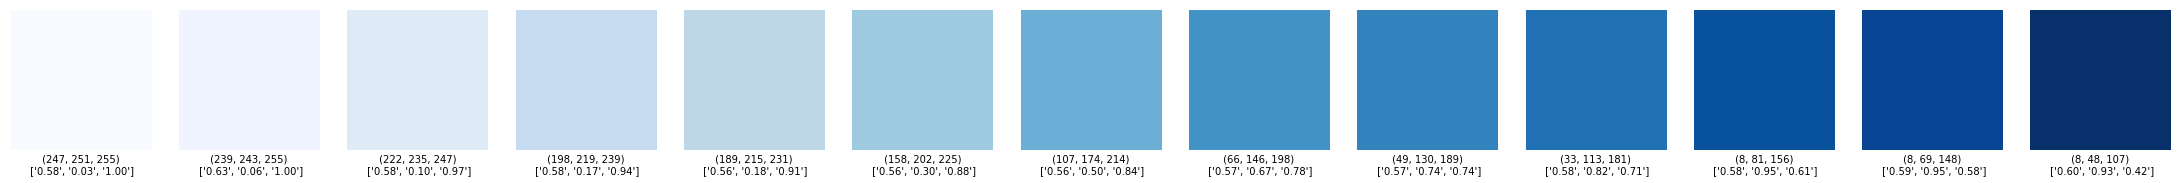

In [57]:
fig, axes = plt.subplots(1,len(rgb))
for i, ax in enumerate(axes):
    ax.imshow([[rgb[i]]])
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel(" {0} \n {1}".format(rgb_255[i], ["{0:.2f}".format(j) for j in hsv[0][i]]))
fig.subplots_adjust(left=0.0, right=5.0, bottom = 0.0, top = 5.0)